## Decision Trees

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
iris = load_iris()

In [15]:
x = iris.data[:, 2:] # petal length and width
y = iris.target

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [17]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

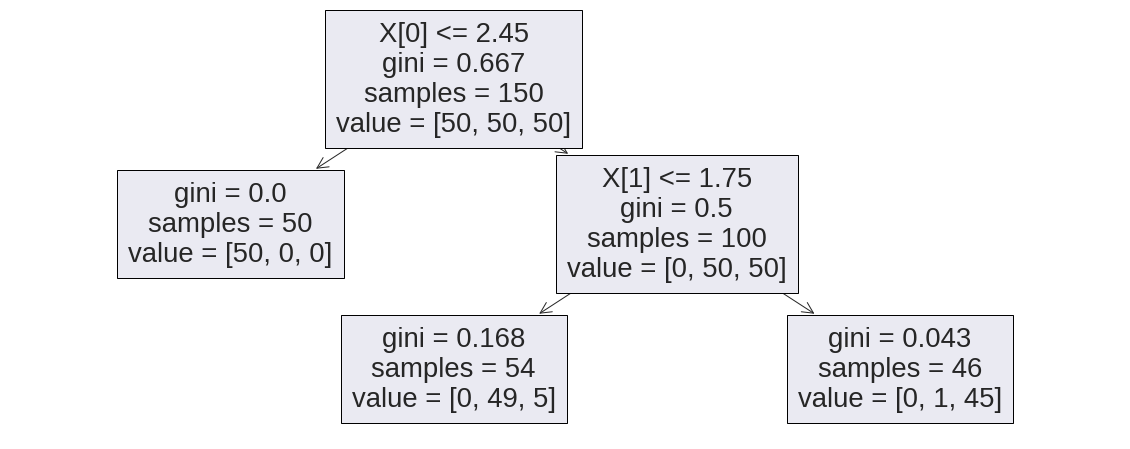

In [18]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(tree_clf)

### Overfitting em árvores de decisão

In [20]:
from sklearn.datasets import make_blobs
plt.style.use("seaborn-darkgrid")

x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)

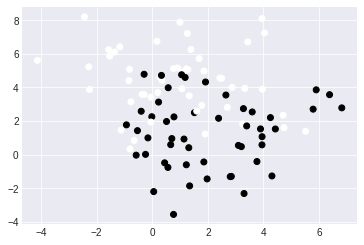

In [21]:
plt.style.use("seaborn-dark-palette")
plt.scatter(x[:, 0], x[:, 1], c=y)

### DecisionTreee Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

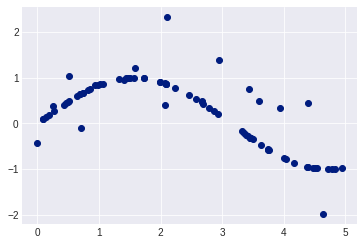

In [23]:
plt.scatter(x, y)

In [24]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

DecisionTreeRegressor(max_depth=5)

[Text(0.5, 0.8333333333333334, 'X[0] <= 3.133\nsquared_error = 0.565\nsamples = 80\nvalue = 0.234'),
 Text(0.25, 0.5, 'X[0] <= 0.502\nsquared_error = 0.178\nsamples = 51\nvalue = 0.672'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.063\nsamples = 10\nvalue = 0.206'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.141\nsamples = 41\nvalue = 0.786'),
 Text(0.75, 0.5, 'X[0] <= 4.391\nsquared_error = 0.313\nsamples = 29\nvalue = -0.537'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.206\nsamples = 20\nvalue = -0.286'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.101\nsamples = 9\nvalue = -1.093')]

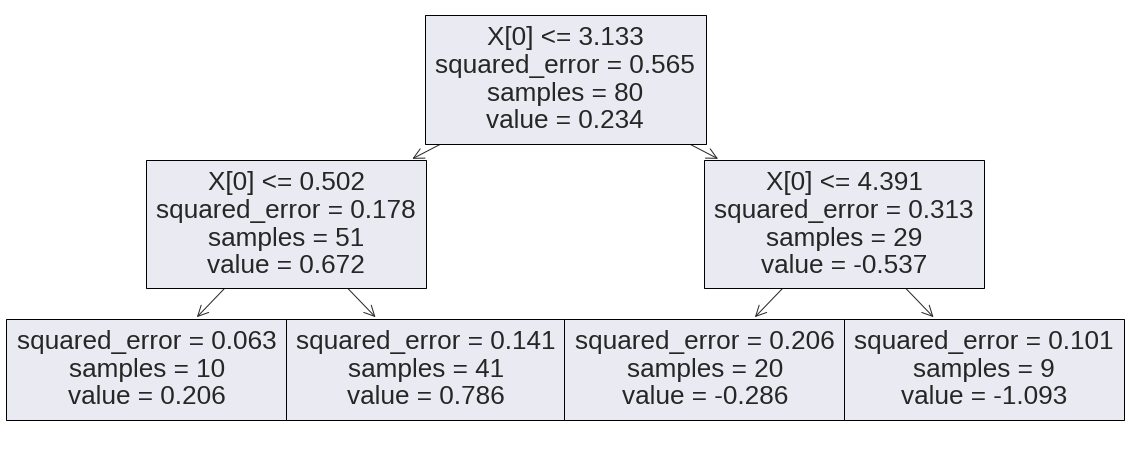

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_1)

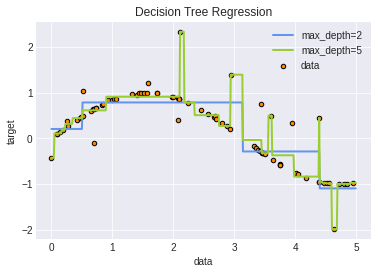

In [26]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Ensemble Learning

In [28]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
x = breast_cancer.data[:, 3:5] # petal length and width
y = breast_cancer.target

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [30]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
breast_cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC())])

In [35]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9064327485380117
DecisionTreeClassifier 0.8888888888888888
SVC 0.8947368421052632
VotingClassifier 0.9122807017543859


### Random Forests

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
tree_clf = DecisionTreeClassifier(max_depth=40)

bag_clf.fit(x_train, y_train)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

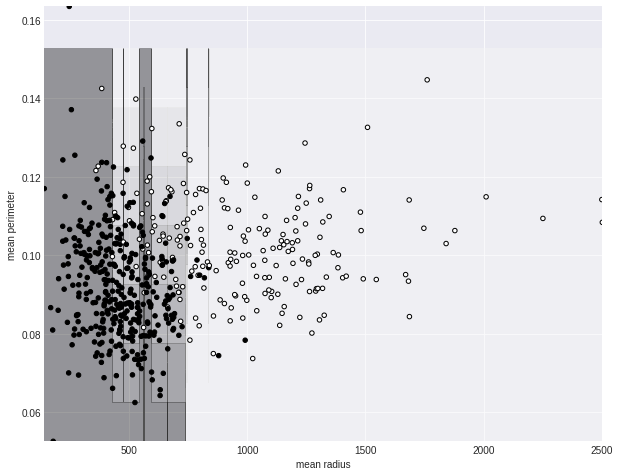

In [37]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [38]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.8830409356725146
0.9298245614035088


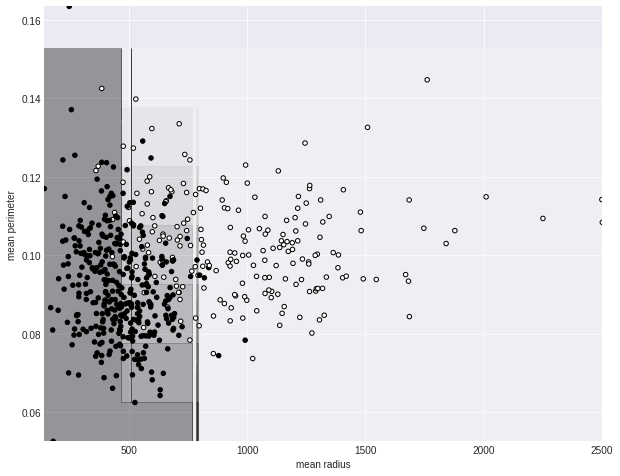

In [39]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

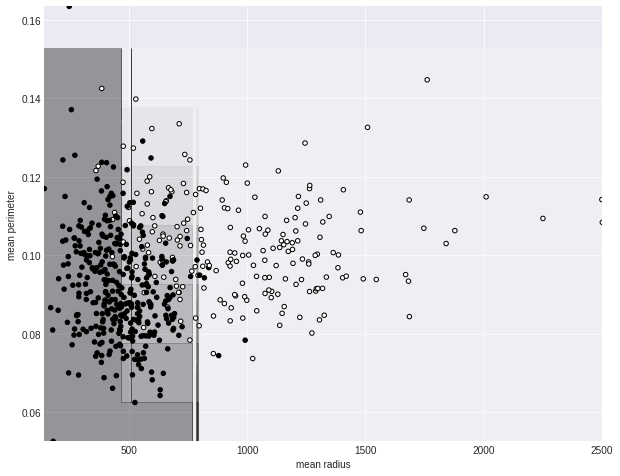

In [41]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="k")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

### Feature importance

In [42]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data # petal length and width
y = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

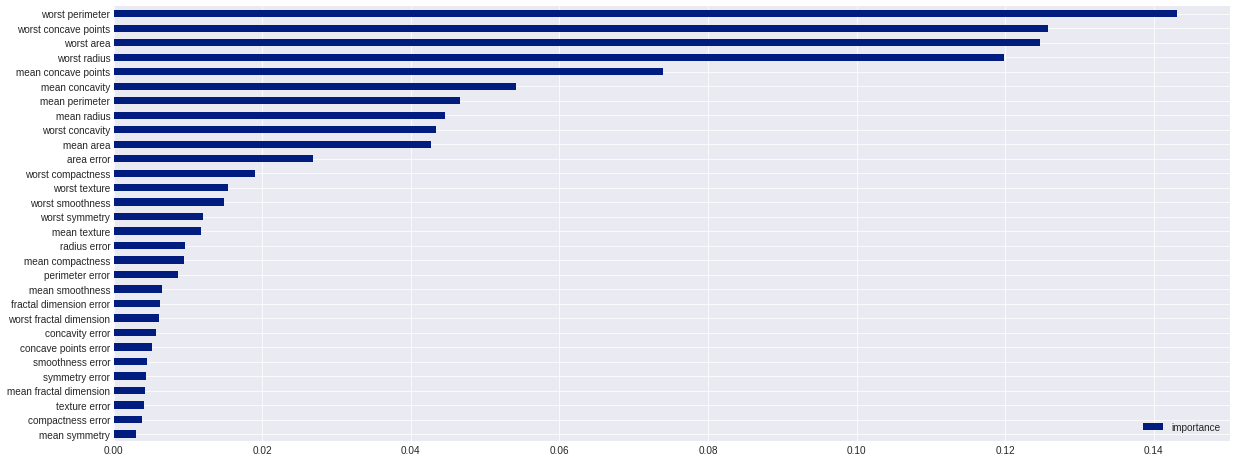

In [44]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_,
                                   index = breast_cancer["feature_names"],
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)